In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wfdb
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


In [2]:
def load_data():
    path = '~/Desktop/ECGSignalClassifer/ptb-xl/'
    dataset = pd.read_json(path+'updated_ptbxl_database.json')
    dataset = dataset[['age', 'sex', 'weight', 'height', 'AD']]

    test_split = int(0.8 * len(dataset))
    X = dataset[['age', 'sex', 'weight', 'height']]
    y = dataset[['AD']]

    train_df = pd.concat([X.iloc[:test_split], y.iloc[:test_split]], axis=1).dropna()
    test_df = pd.concat([X.iloc[test_split:], y.iloc[test_split:]], axis=1).dropna()

    train_data, train_labels = train_df[['age', 'sex', 'weight', 'height']], train_df['AD'].to_numpy()
    test_data, test_labels = test_df[['age', 'sex', 'weight', 'height']], test_df['AD'].to_numpy()

    return train_data, train_labels, test_data, test_labels

# L1 Logistic Regression, Basic Data

0.09999999999999999 0.6563706563706564
0.16681005372000587 0.6544401544401545
0.2782559402207124 0.6525096525096525
0.46415888336127786 0.6525096525096525
0.7742636826811269 0.6525096525096525
1.2915496650148839 0.6525096525096525
2.1544346900318834 0.6525096525096525
3.5938136638046254 0.6525096525096525
5.994842503189409 0.6525096525096525
10.0 0.6525096525096525


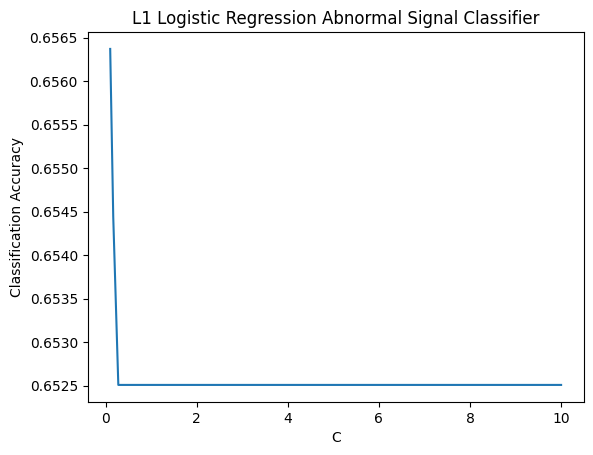

In [3]:
train_data, train_labels, test_data, test_labels = load_data()

# Initialize lists to store results
coefs = []
accuracies = []

# Define the range of lambda values (from 10^-1 to 10^8)
lambda_values = np.logspace(-1, 1, num=10)  # Generates 10 values logarithmically spaced between 10^-1 and 10^8

for C in lambda_values:

    # Fit the model with L2 regularization
    fit = LogisticRegression(penalty='l1', solver='saga', warm_start=True, C=C, max_iter=10000).fit(train_data, train_labels)

    # Make predictions and calculate accuracy
    prediction_labels = fit.predict(test_data)
    accuracy = accuracy_score(test_labels, prediction_labels)

    print(C, accuracy)
    # Store results
    coefs.append(C)
    accuracies.append(accuracy)

plt.plot(coefs, accuracies)
plt.title('L1 Logistic Regression Abnormal Signal Classifier')
plt.xlabel('C')
plt.ylabel('Classification Accuracy')
plt.show()

# L2 Logistic Regression, Basic Data

0.09999999999999999 0.6525096525096525
0.16681005372000587 0.6525096525096525
0.2782559402207124 0.6525096525096525
0.46415888336127786 0.6525096525096525
0.7742636826811269 0.6525096525096525
1.2915496650148839 0.6525096525096525
2.1544346900318834 0.6525096525096525
3.5938136638046254 0.6525096525096525
5.994842503189409 0.6525096525096525
10.0 0.6525096525096525


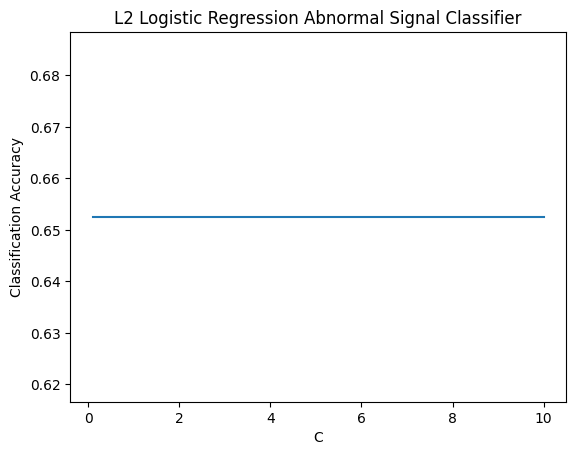

In [4]:
train_data, train_labels, test_data, test_labels = load_data()

# Initialize lists to store results
coefs = []
accuracies = []

# Define the range of lambda values (from 10^-1 to 10^8)
lambda_values = np.logspace(-1, 1, num=10)  # Generates 10 values logarithmically spaced between 10^-1 and 10^8

for C in lambda_values:

    # Fit the model with L2 regularization
    fit = LogisticRegression(penalty='l2', solver='saga', warm_start=True, C=C, max_iter=10000).fit(train_data, train_labels)

    # Make predictions and calculate accuracy
    prediction_labels = fit.predict(test_data)
    accuracy = accuracy_score(test_labels, prediction_labels)

    print(C, accuracy)
    # Store results
    coefs.append(C)
    accuracies.append(accuracy)

plt.plot(coefs, accuracies)
plt.title('L2 Logistic Regression Abnormal Signal Classifier')
plt.xlabel('C')
plt.ylabel('Classification Accuracy')
plt.show()

# Random Forest Classifier, Basic Data

2 0.6505791505791506
3 0.6544401544401545
4 0.6583011583011583
5 0.6505791505791506
6 0.6486486486486487
7 0.6467181467181468
8 0.6486486486486487
9 0.6486486486486487
10 0.637065637065637
11 0.6254826254826255
12 0.6486486486486487
13 0.6428571428571429
14 0.6428571428571429


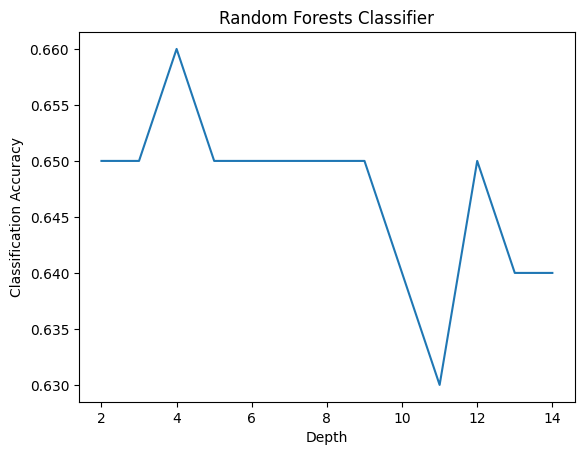

In [5]:
train_data, train_labels, test_data, test_labels = load_data()

# Initialize lists to store results
depths = []
accuracies = []

for depth in range(2, 15):
    # Fit the model with L2 regularization
    fit = RandomForestClassifier(n_estimators=500, max_depth=depth).fit(train_data, train_labels)

    # Make predictions and calculate accuracy
    prediction_labels = fit.predict(test_data)
    accuracy = accuracy_score(test_labels, prediction_labels)

    print(depth, accuracy)
    # Store results
    depths.append(depth)
    accuracies.append(round(accuracy, 2))

plt.plot(depths, accuracies)
plt.title('Random Forests Classifier')
plt.xlabel('Depth')
plt.ylabel('Classification Accuracy')
plt.show()

# XG Boost, Basic Data

2 0.6525096525096525
3 0.6505791505791506
4 0.6563706563706564
5 0.6583011583011583
6 0.6544401544401545
7 0.638996138996139
8 0.6351351351351351
9 0.6467181467181468
10 0.6293436293436293
11 0.6254826254826255
12 0.6081081081081081
13 0.6003861003861004
14 0.6023166023166023


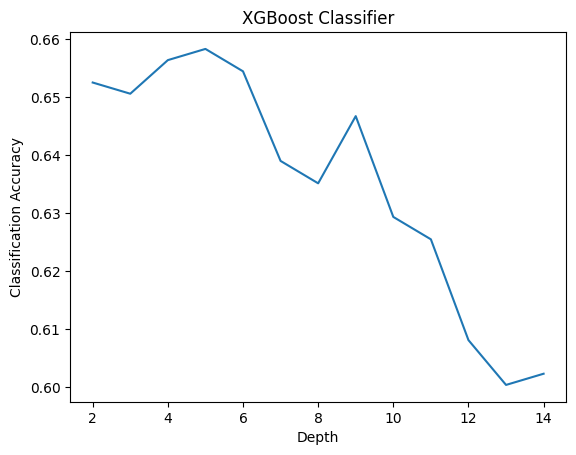

In [6]:
from xgboost import XGBRegressor

train_data, train_labels, test_data, test_labels = load_data()

# Initialize lists to store results
depths = []
accuracies = []

for depth in range(2, 15):

    model = XGBRegressor(n_estimators=500, max_depth=depth, learning_rate=0.01, objective='reg:squarederror')
    model.fit(train_data.to_numpy().astype(np.float32), train_labels)

    prediction_labels = model.predict(test_data.to_numpy().astype(np.float32))
    threshold = 0.5
    prediction_labels = np.where(prediction_labels - np.floor(prediction_labels) >= threshold, np.ceil(prediction_labels), np.floor(prediction_labels)).astype(int)
    accuracy = accuracy_score(test_labels, prediction_labels)

    print(depth, accuracy)

    depths.append(depth)
    accuracies.append(accuracy)

plt.plot(depths, accuracies)
plt.title('XGBoost Classifier')
plt.xlabel('Depth')
plt.ylabel('Classification Accuracy')
plt.show()

# Random Forest, Interaction Data

In [7]:
import patsy

train_data, train_labels, test_data, test_labels = load_data()

# Define your formula for polynomial features, for example:
# Including 2nd-degree polynomial terms for 'age' and 'height'
# 'C(sex)' indicates that 'sex' is treated as a categorical variable
formula = 'age:weight:sex'

# Create design matrices for training data
poly_train_data = patsy.dmatrix(formula, data=train_data, return_type='dataframe')

# Create design matrices for test data
poly_test_data = patsy.dmatrix(formula, data=test_data, return_type='dataframe')

# Initialize lists to store results
coefs = []
accuracies = []

# Define the range of lambda values (from 10^-1 to 10^8)
lambda_values = np.logspace(-1, 8, num=10)  # Generates 10 values logarithmically spaced between 10^-1 and 10^8

for depth in range(1, 20):

    # Fit the model with L2 regularization
    #fit = LogisticRegression(penalty='l2', solver='saga', warm_start=True, C=C, fit_intercept=False, max_iter=10000).fit(train_data, train_labels)
    fit = RandomForestClassifier(n_estimators=500, max_depth=depth).fit(poly_train_data, train_labels)

    # Make predictions and calculate accuracy
    prediction_labels = fit.predict(poly_test_data)
    accuracy = accuracy_score(test_labels, prediction_labels)

    print(depth, accuracy)
    # Store results
    coefs.append(depth)
    accuracies.append(accuracy)


1 0.5540540540540541
2 0.5907335907335908
3 0.6081081081081081
4 0.6138996138996139
5 0.6042471042471043
6 0.6003861003861004
7 0.5965250965250966
8 0.6003861003861004
9 0.6081081081081081
10 0.6003861003861004
11 0.5907335907335908
12 0.5945945945945946
13 0.5907335907335908
14 0.583011583011583
15 0.583011583011583


KeyboardInterrupt: 

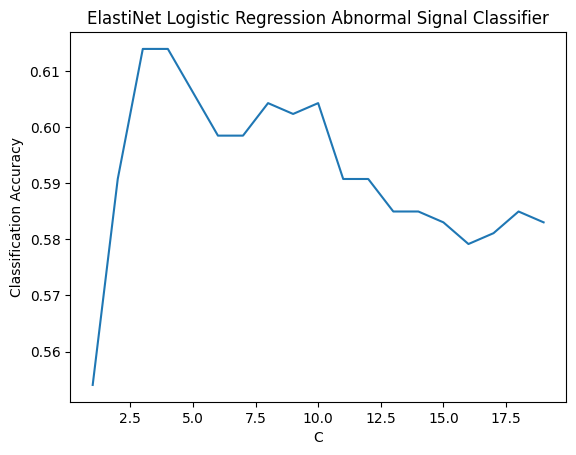

In [ ]:
plt.plot(coefs, accuracies)
plt.title('ElastiNet Logistic Regression Abnormal Signal Classifier')
plt.xlabel('C')
plt.ylabel('Classification Accuracy')
plt.show()

In [8]:
path = '~/Desktop/ECGSignalClassifer/ptb-xl/'
dataset = pd.read_json(path+'updated_ptbxl_database.json')
print(dataset.columns)

dataset = dataset[['filename_lr', 'filename_hr', 'MI', 'STTC', 'CD', 'HYP', 'AD']]
leads = ['I', 'II', 'V2']
classes = ['MI', 'STTC', 'CD', 'HYP', 'AD']
batch_size = 32

train_percentage = 0.70
test_percentage = 0.15
validation_percentage = 0.15

assert(train_percentage + test_percentage + validation_percentage == 1)

# Extract X and y
X = dataset[['filename_lr', 'filename_hr']]
y = dataset[['MI', 'STTC', 'CD', 'HYP', 'AD']]

# Train/Test split
splitter = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=test_percentage, random_state=0)
train_indices, test_indices = next(splitter.split(X, y))

# Train/Validation split
splitter = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=validation_percentage / (1 - test_percentage), random_state=0)
train_indices, validation_indices = next(splitter.split(X.iloc[train_indices], y.iloc[train_indices]))

# Assign splits
train_df = pd.concat([X.iloc[train_indices], y.iloc[train_indices]], axis=1)
validate_df = pd.concat([X.iloc[validation_indices], y.iloc[validation_indices]], axis=1)
test_df = pd.concat([X.iloc[test_indices], y.iloc[test_indices]], axis=1)

# Check split sizes
print(len(train_df), len(validate_df), len(test_df))

def load_batch(df, path='ptb-xl/', sampling_rate=100):
    df_files = df.filename_lr if sampling_rate == 100 else df.filename_hr
    data = np.array([
                  wfdb.rdsamp(path+f, channel_names=leads, return_res=32)[0].T
            for f in df_files
        ])
    ''''''
    
    labels = df[classes].to_numpy()
    labels = labels[:, -1]
    
    return data, labels

train_data, train_labels = load_batch(train_df[:5_000], path='ptb-xl/', sampling_rate=100)
test_data, test_labels = load_batch(test_df[:1_000])

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'diagnostic_superclass', 'NORM', 'MI', 'STTC', 'CD', 'HYP', 'AD'],
      dtype='object')
15243 3295 3261


In [9]:
from scipy.stats import entropy
from antropy import app_entropy,  perm_entropy, svd_entropy
from scipy.signal import welch, butter, sosfilt, sosfreqz, ShortTimeFFT, get_window

# Band pass filter
lowcut = 1.0          # Lower cutoff frequency (Hz)
highcut = 45.0        # Upper cutoff frequency (Hz)
fs = 100.0            # Sampling frequency (Hz)
order = 4             # Filter order (higher = steeper rolloff)

# Define the IIR bandpass filter
def design_iir_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='band', output='sos')  # Second-order sections
    return sos

# Design the filter
sos = design_iir_bandpass(lowcut, highcut, fs, order)

def apply_filter(signal, sos):
    return sosfilt(sos, signal)

def compute_shannon_entropy(signal, bins=10):
    hist, _ = np.histogram(signal, bins=bins, density=True)
    return entropy(hist)

def compute_approximate_entropy(signal, m=2, r=0.2):
    return app_entropy(signal, order=m, metric='chebyshev')

def compute_permutation_entropy(signal, order=3, delay=1):
    return perm_entropy(signal, order=order, delay=delay)

def compute_spectral_entropy(signal, fs=100):
    f, Pxx = welch(signal)
    Pxx_norm = Pxx / np.sum(Pxx)
    return -np.sum(Pxx_norm * np.log(Pxx_norm))

def compute_svd_entropy(signal, delay=1, dimension=3):
    return svd_entropy(signal, delay=delay)

def compute_renyi_entropy(signal, alpha=2, bins=10):
    hist, _ = np.histogram(signal, bins=bins, density=True)
    hist = hist[hist > 0]
    return (1 / (1 - alpha)) * np.log(np.sum(hist**alpha))

def compute_tsallis_entropy(signal, q=2, bins=10):
    hist, _ = np.histogram(signal, bins=bins, density=True)
    hist = hist[hist > 0]
    return (1 / (q - 1)) * (1 - np.sum(hist**q))

def compute_extropy(signal, bins=10):
    hist, _ = np.histogram(signal, bins=bins, density=True)
    hist = hist[(hist > 0) & (hist < 1)]
    value = -np.sum(hist * np.log(1 - hist))
    return value

def compute_entropy_vector(signal):
    return np.array([
        compute_shannon_entropy(signal),
        compute_approximate_entropy(signal),
        compute_permutation_entropy(signal),
        compute_spectral_entropy(signal),
        compute_svd_entropy(signal),
        compute_renyi_entropy(signal),
        compute_tsallis_entropy(signal),
        compute_extropy(signal)
    ])

In [10]:
# Initialize lists to store results
coefs = []
accuracies = []
sigmas = np.std(train_data, axis = 0)
train_data = train_data / sigmas

train_data = [np.array([compute_entropy_vector(apply_filter(y, sos)) for y in x]).flatten() for x in train_data]

test_data = [np.array([compute_entropy_vector(apply_filter(y, sos)) for y in x]).flatten() for x in test_data]

KeyboardInterrupt: 

In [ ]:
# Define the range of lambda values (from 10^-1 to 10^8)
lambda_values = np.logspace(-1, 5, num=10)  # Generates 10 values logarithmically spaced between 10^-1 and 10^8


    # Fit the model with L2 regularization
    #fit = LogisticRegression(penalty='l2', warm_start = True, solver='saga', C=C, fit_intercept=False, max_iter=10000).fit(train_data, train_labels)
fit = RandomForestClassifier(n_estimators=1000, max_depth=20).fit(train_data, train_labels)
# Make predictions and calculate accuracy
prediction_labels = fit.predict(test_data)
accuracy = accuracy_score(test_labels, prediction_labels)
print(accuracy)

# Store results
accuracies.append(accuracy)

In [ ]:
plt.plot(coefs, accuracies)
plt.title('ElastiNet Logistic Regression Abnormal Signal Classifier')
plt.xlabel('C')
plt.ylabel('Classification Accuracy')
plt.show()